In \[1\]:

    #Clustering Algorithm

In \[3\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns

    import matplotlib.pyplot as plt

In \[4\]:

    df_76=pd.read_csv('Mall_Customers.csv')

In \[5\]:

    df_76

Out\[5\]:

|     | CustomerID | Genre  | Age | Annual Income (k\$) | Spending Score (1-100) |
|-----|------------|--------|-----|---------------------|------------------------|
| 0   | 1          | Male   | 19  | 15                  | 39                     |
| 1   | 2          | Male   | 21  | 15                  | 81                     |
| 2   | 3          | Female | 20  | 16                  | 6                      |
| 3   | 4          | Female | 23  | 16                  | 77                     |
| 4   | 5          | Female | 31  | 17                  | 40                     |
| ... | ...        | ...    | ... | ...                 | ...                    |
| 195 | 196        | Female | 35  | 120                 | 79                     |
| 196 | 197        | Female | 45  | 126                 | 28                     |
| 197 | 198        | Male   | 32  | 126                 | 74                     |
| 198 | 199        | Male   | 32  | 137                 | 18                     |
| 199 | 200        | Male   | 30  | 137                 | 83                     |

200 rows × 5 columns

In \[6\]:

    x=df_76.iloc[:,3:]

In \[7\]:

    x

Out\[7\]:

|     | Annual Income (k\$) | Spending Score (1-100) |
|-----|---------------------|------------------------|
| 0   | 15                  | 39                     |
| 1   | 15                  | 81                     |
| 2   | 16                  | 6                      |
| 3   | 16                  | 77                     |
| 4   | 17                  | 40                     |
| ... | ...                 | ...                    |
| 195 | 120                 | 79                     |
| 196 | 126                 | 28                     |
| 197 | 126                 | 74                     |
| 198 | 137                 | 18                     |
| 199 | 137                 | 83                     |

200 rows × 2 columns

In \[8\]:

    plt.title('Unclustered data')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

Out\[8\]:

    <matplotlib.collections.PathCollection at 0x24c4c81f730>

![](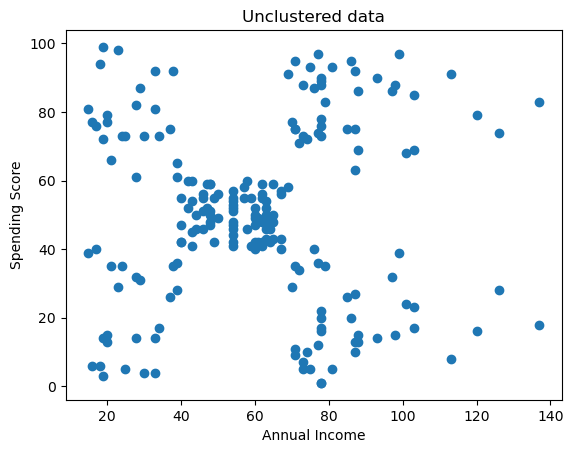%0A)

In \[9\]:

    from sklearn.cluster import KMeans, AgglomerativeClustering

In \[10\]:

    km=KMeans(n_clusters=3)

In \[11\]:

    x.shape

Out\[11\]:

    (200, 2)

In \[12\]:

    km.fit_predict(x)

Out\[12\]:

    array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
           2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
           2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
           2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
           2, 0])

In \[13\]:

    # SSE
    km.inertia_

Out\[13\]:

    106348.37306211118

In \[14\]:

    sse = []
    for k in range(1,16):
        km = KMeans(n_clusters=k)
        km.fit_predict(x)
        sse.append(km.inertia_)

    C:\Users\Local-Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
      warnings.warn(

In \[15\]:

    sse

Out\[15\]:

    [269981.28,
     181363.59595959593,
     106348.37306211118,
     73679.78903948836,
     44448.45544793371,
     37265.86520484347,
     30259.65720728547,
     25022.48500453035,
     21862.092672182887,
     19657.783608703954,
     17556.600879214166,
     15961.902986261051,
     14263.509036079624,
     13225.694374399547,
     12028.446061046798]

In \[16\]:

    plt.title('Elbow Method')
    plt.xlabel('Value of K')
    plt.ylabel('SSE')
    plt.grid()
    plt.xticks(range(1,16))
    plt.plot(range(1,16), sse, marker='.', color='red')

Out\[16\]:

    [<matplotlib.lines.Line2D at 0x24c4d9be040>]

![](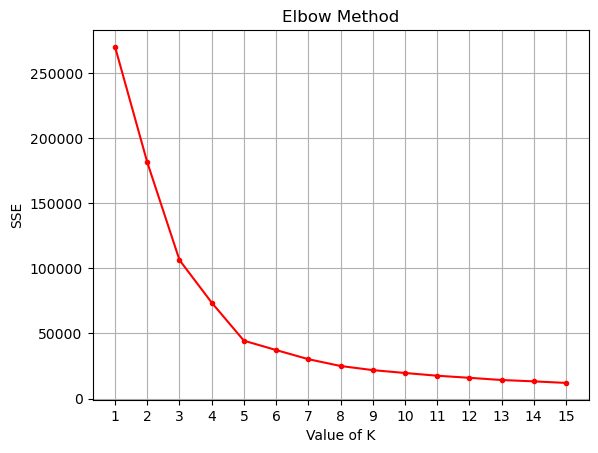%0A)

In \[17\]:

    from sklearn.metrics import silhouette_score

In \[18\]:

    silh = []
    for k in range(2,16):
        km = KMeans(n_clusters=k)
        labels = km.fit_predict(x)
        score = silhouette_score(x, labels)
        silh.append(score)

In \[19\]:

    plt.title('Silhoutte Method')
    plt.xlabel('Value of K')
    plt.ylabel('SSE')
    plt.grid()
    plt.xticks(range(2,16))
    plt.bar(range(2,16), silh, color='red')

Out\[19\]:

    <BarContainer object of 14 artists>

![](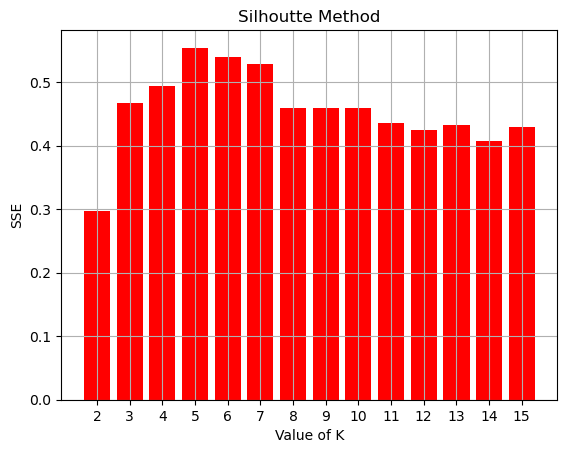%0A)

In \[20\]:

    km = KMeans(n_clusters=5, random_state=0)

In \[21\]:

    labels = km.fit_predict(x)

In \[22\]:

    labels

Out\[22\]:

    array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
           4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
           4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
           1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2])

In \[23\]:

    km.cluster_centers_

Out\[23\]:

    array([[88.2       , 17.11428571],
           [55.2962963 , 49.51851852],
           [86.53846154, 82.12820513],
           [25.72727273, 79.36363636],
           [26.30434783, 20.91304348]])

In \[24\]:

    cent=km.cluster_centers_

In \[25\]:

    plt.figure(figsize=(16,9))
    plt.subplot(1,2,1)
    plt.title('Unclustered data')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

    plt.subplot(1,2,2)
    plt.title('Clustered data')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
    plt.scatter(cent[:,0], cent[:,1], s=100, color='k')

Out\[25\]:

    <matplotlib.collections.PathCollection at 0x24c4ede7d90>

![](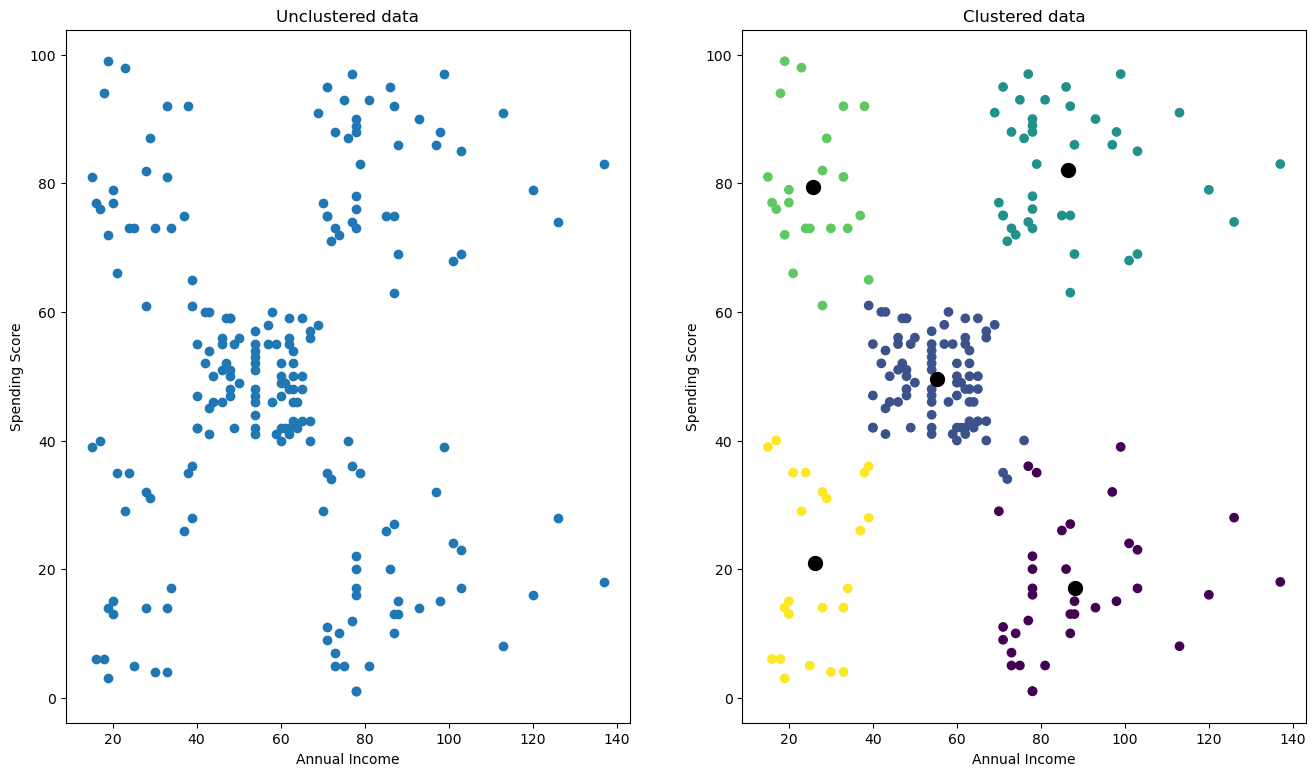%0A)

In \[26\]:

    km.inertia_

Out\[26\]:

    44448.45544793371

In \[27\]:

    km.labels_

Out\[27\]:

    array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
           4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
           4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
           1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2])

In \[28\]:

    df_76[labels==4]

Out\[28\]:

|     | CustomerID | Genre  | Age | Annual Income (k\$) | Spending Score (1-100) |
|-----|------------|--------|-----|---------------------|------------------------|
| 0   | 1          | Male   | 19  | 15                  | 39                     |
| 2   | 3          | Female | 20  | 16                  | 6                      |
| 4   | 5          | Female | 31  | 17                  | 40                     |
| 6   | 7          | Female | 35  | 18                  | 6                      |
| 8   | 9          | Male   | 64  | 19                  | 3                      |
| 10  | 11         | Male   | 67  | 19                  | 14                     |
| 12  | 13         | Female | 58  | 20                  | 15                     |
| 14  | 15         | Male   | 37  | 20                  | 13                     |
| 16  | 17         | Female | 35  | 21                  | 35                     |
| 18  | 19         | Male   | 52  | 23                  | 29                     |
| 20  | 21         | Male   | 35  | 24                  | 35                     |
| 22  | 23         | Female | 46  | 25                  | 5                      |
| 24  | 25         | Female | 54  | 28                  | 14                     |
| 26  | 27         | Female | 45  | 28                  | 32                     |
| 28  | 29         | Female | 40  | 29                  | 31                     |
| 30  | 31         | Male   | 60  | 30                  | 4                      |
| 32  | 33         | Male   | 53  | 33                  | 4                      |
| 34  | 35         | Female | 49  | 33                  | 14                     |
| 36  | 37         | Female | 42  | 34                  | 17                     |
| 38  | 39         | Female | 36  | 37                  | 26                     |
| 40  | 41         | Female | 65  | 38                  | 35                     |
| 42  | 43         | Male   | 48  | 39                  | 36                     |
| 44  | 45         | Female | 49  | 39                  | 28                     |

In \[29\]:

    import scipy.cluster.hierarchy as sch
    dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Eucledian distances')
    plt.show()

![](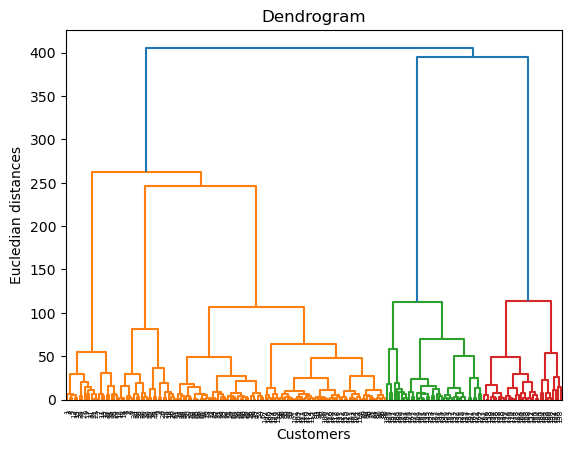%0A)

In \[30\]:

    from sklearn.cluster import AgglomerativeClustering

In \[31\]:

    agl=AgglomerativeClustering
    alabel=km.fit_predict(x)

In \[32\]:

    alabel

Out\[32\]:

    array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
           4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
           4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
           1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
           0, 2])

In \[33\]:

    plt.title('agglomerative clustering')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabel)

Out\[33\]:

    <matplotlib.collections.PathCollection at 0x24c4f236f10>

![](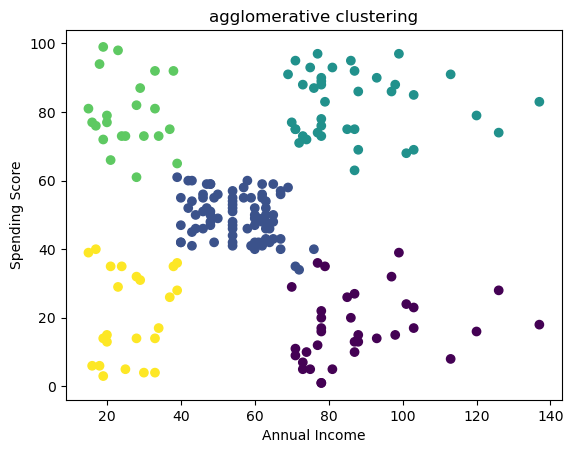%0A)

In \[ \]: